# Author: Minhaj Uddin Meraj¶

# TASK 3: Exploratory Data Analysis - Terrorism

● Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’

● As a security/defense analyst, try to find out the hot zone of terrorism.

● What all security issues and insights you can derive by EDA?

## Importing Libraries

In [2]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
sns.set()

In [3]:
import warnings
warnings.filterwarnings('ignore')
df_terror = pd.read_csv("Dataset.csv")

In [4]:
df_terror.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [5]:
df_terror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [6]:
df_terror.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df_terror.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [8]:
df_terror.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','extended':'Extended_events','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [9]:
# Taking Important Data those I'm using for further processing
df_terror=df_terror[['Year','Month','Day',
                     'Extended_events','Country','state','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [10]:
df_terror.head()

,Year,Month,Day,Extended_events,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,0,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [11]:
# Checking the null velues in data
df_terror.isnull().sum()

Year                    0
Month                   0
Day                     0
Extended_events         0
Country                 0
state                 421
Region                  0
city                  434
latitude             4556
longitude            4557
AttackType              0
Killed              10313
Wounded             16311
Target                636
Summary             66129
Group                   0
Target_type             0
Weapon_type             0
Motive             131130
dtype: int64

In [12]:
df_terror.info() # Returns the concise summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Year             181691 non-null  int64  
 1   Month            181691 non-null  int64  
 2   Day              181691 non-null  int64  
 3   Extended_events  181691 non-null  int64  
 4   Country          181691 non-null  object 
 5   state            181270 non-null  object 
 6   Region           181691 non-null  object 
 7   city             181257 non-null  object 
 8   latitude         177135 non-null  float64
 9   longitude        177134 non-null  float64
 10  AttackType       181691 non-null  object 
 11  Killed           171378 non-null  float64
 12  Wounded          165380 non-null  float64
 13  Target           181055 non-null  object 
 14  Summary          115562 non-null  object 
 15  Group            181691 non-null  object 
 16  Target_type      181691 non-null  obje

# Checking Destructive Features In Data

In [13]:
print("Country with the most attacks:",df_terror['Country'].value_counts().idxmax())
print("City with the most attacks:",df_terror['city'].value_counts().index[1]) #as first entry is 'unknown'
print("Region with the most attacks:",df_terror['Region'].value_counts().idxmax())
print("Year with the most attacks:",df_terror['Year'].value_counts().idxmax())
print("Month with the most attacks:",df_terror['Month'].value_counts().idxmax())
print("Group with the most attacks:",df_terror['Group'].value_counts().index[1])
print("Most Attack Types:",df_terror['AttackType'].value_counts().idxmax())

Country with the most attacks: Iraq
City with the most attacks: Baghdad
Region with the most attacks: Middle East & North Africa
Year with the most attacks: 2014
Month with the most attacks: 5
Group with the most attacks: Taliban
Most Attack Types: Bombing/Explosion


In [14]:
df_terror['Year'].value_counts(dropna = False).sort_index()

1970      651
1971      471
1972      568
1973      473
1974      581
1975      740
1976      923
1977     1319
1978     1526
1979     2662
1980     2662
1981     2586
1982     2544
1983     2870
1984     3495
1985     2915
1986     2860
1987     3183
1988     3721
1989     4324
1990     3887
1991     4683
1992     5071
1994     3456
1995     3081
1996     3058
1997     3197
1998      934
1999     1395
2000     1814
2001     1906
2002     1333
2003     1278
2004     1166
2005     2017
2006     2758
2007     3242
2008     4805
2009     4721
2010     4826
2011     5076
2012     8522
2013    12036
2014    16903
2015    14965
2016    13587
2017    10900
Name: Year, dtype: int64

## Number of Terrorist Activities each Year

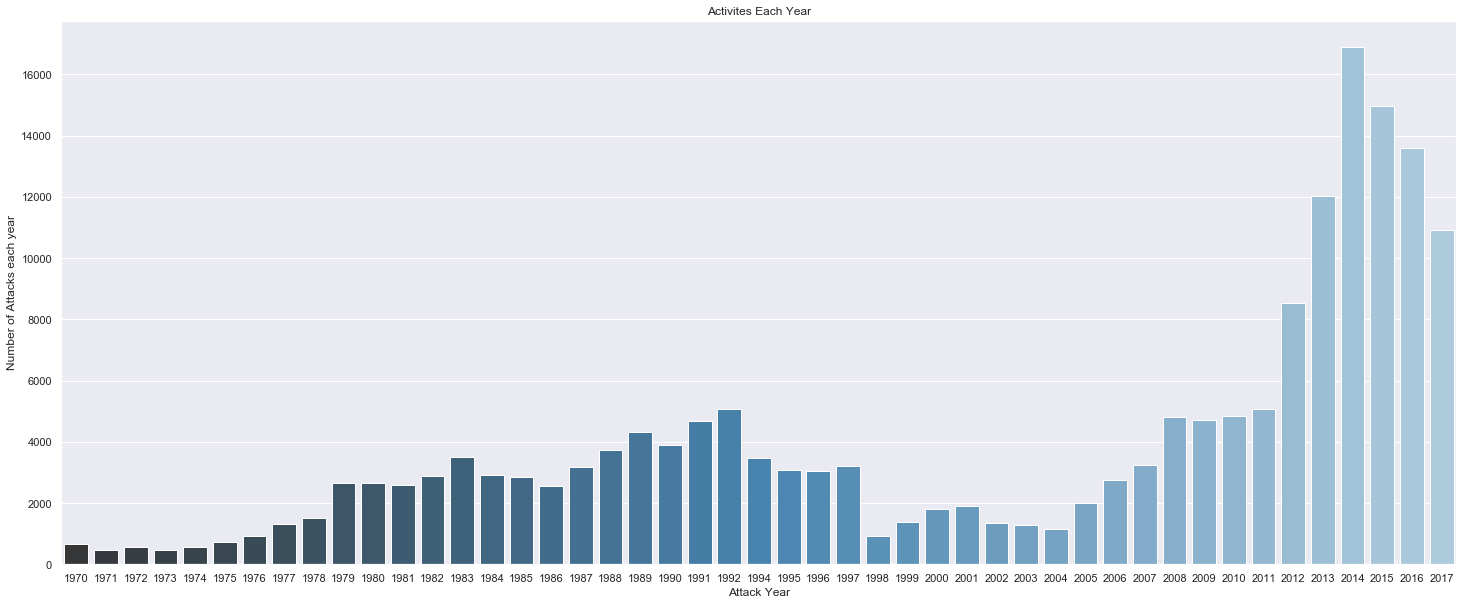

In [15]:
x = df_terror["Year"].unique()
y = df_terror["Year"].value_counts(dropna = False).sort_index()
plt.figure(figsize=(25,10))
sns.barplot(x,y,palette="Blues_d")
plt.xlabel('Attack Year')
plt.ylabel('Number of Attacks each year')
plt.title('Activites Each Year')
plt.show()

Text(0.5, 1.0, 'Activites extended more than 24 hours or not')

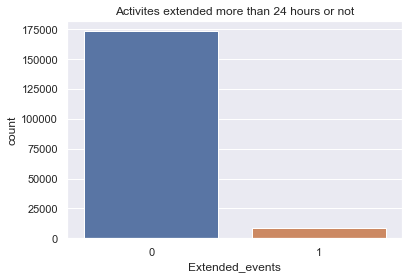

In [16]:
sns.countplot(df_terror['Extended_events'])
plt.title('Activites extended more than 24 hours or not')

# Terrorist Activities by Region

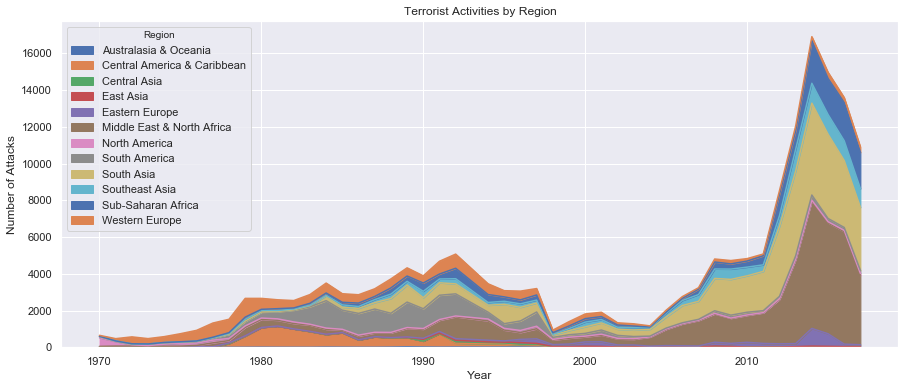

In [17]:
pd.crosstab(df_terror.Year, df_terror.Region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region')
plt.ylabel('Number of Attacks')
plt.show()

In [18]:
df_terror['Wounded'] = df_terror['Wounded'].fillna(0).astype(int)
df_terror['Killed'] = df_terror['Killed'].fillna(0).astype(int)
df_terror['casualities'] = df_terror['Killed'] + df_terror['Wounded']

In [19]:
terror1 = df_terror.sort_values(by='casualities',ascending=False)[:40]

In [20]:
df1=terror1.pivot_table(index='Country',columns='Year',values='casualities')
df1.fillna(0,inplace=True)

In [21]:
df1.head()

Year,1982,1984,1992,1994,1995,1996,1997,1998,2001,2004,2005,2006,2007,2008,2009,2014,2015,2016,2017
Country,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,536.0,0.0,584.0
Chad,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1161.0,0.0,0.0,0.0,0.0,0.0
Ethiopia,0.0,0.0,500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
France,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,520.0,0.0
India,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1005.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
colorscale = [[0, '#edf8fb'], [.3, '#00BFFF'],  [.6, '#8856a7'],  [1, '#810f7c']]
heatmap = go.Heatmap(z=df1.values, x=df1.columns, y=df1.index, colorscale=colorscale)
data = [heatmap]
layout = go.Layout(
    title='Top 40 Worst Terror Attacks in History from 1982 to 2016',
    xaxis = dict(ticks='', nticks=20),
    yaxis = dict(ticks='')
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='heatmap',show_link=False)

## Top Countries Affected By Terrorist Attacks

In [23]:
df_terror.Country.value_counts()[:15]

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Name: Country, dtype: int64

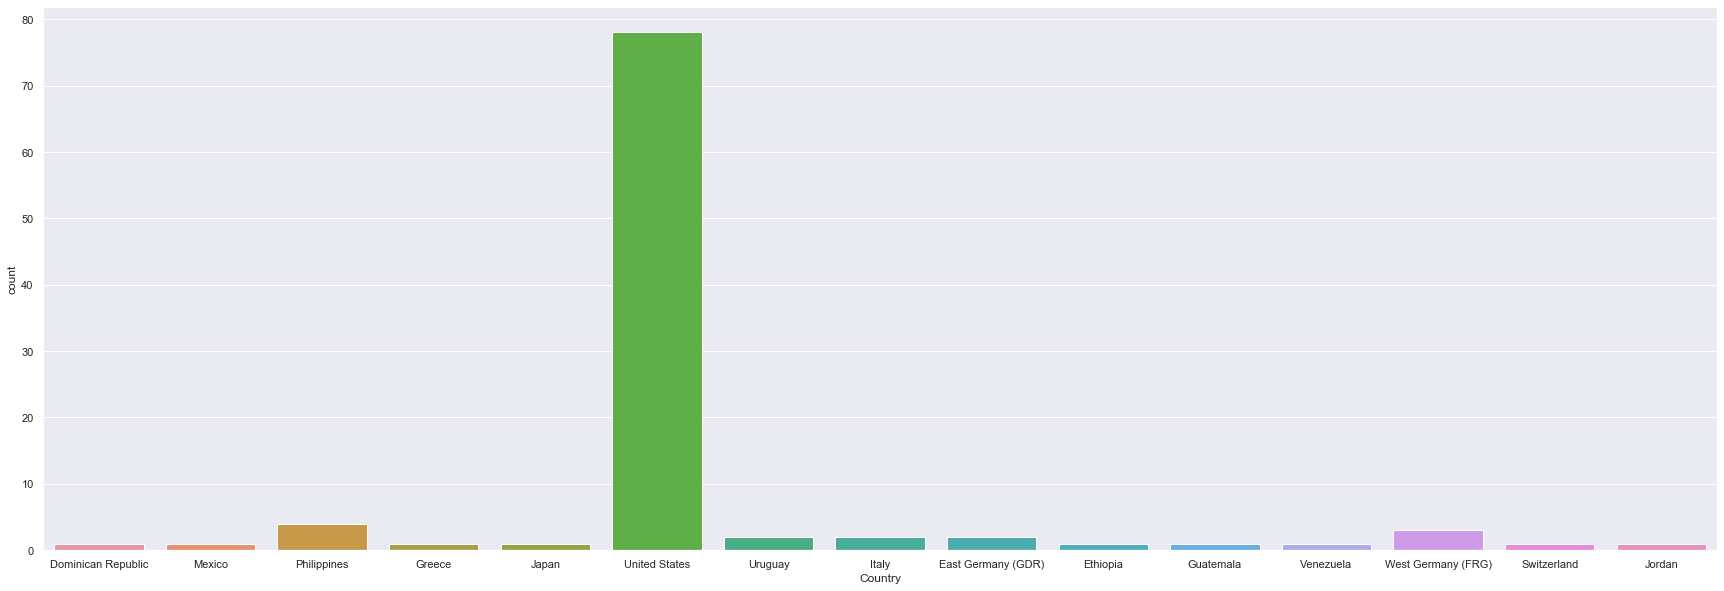

In [24]:
f = plt.figure(figsize=(30,10))
sns.countplot(df_terror['Country'].iloc[:100])

In [25]:
len(df_terror[df_terror['Country']=='United States'])

2836

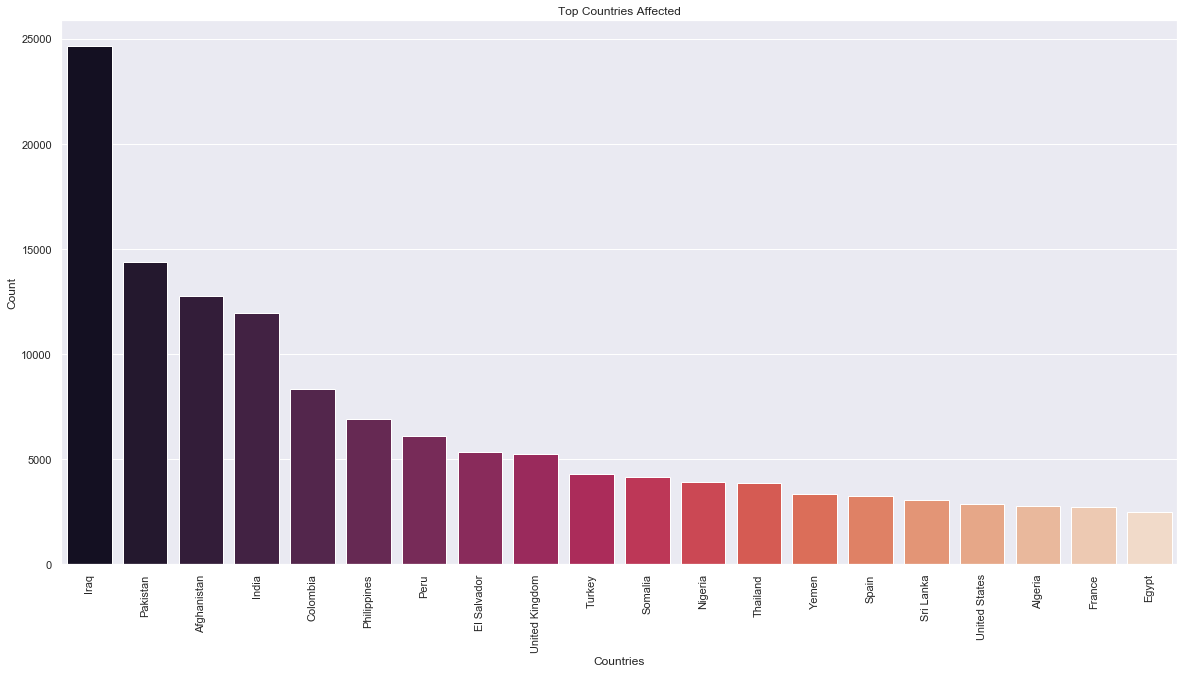

In [26]:
plt.subplots(figsize=(20,10))
sns.barplot(df_terror['Country'].value_counts()[:20].index,df_terror['Country'].value_counts()[:20].values,palette='rocket')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

## Terrorist's Origanizations Operations In Each Country

In [27]:
df_terror.Group.value_counts()[1:20]

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Kurdistan Workers' Party (PKK)                      2310
Basque Fatherland and Freedom (ETA)                 2024
Communist Party of India - Maoist (CPI-Maoist)      1878
Maoists                                             1630
Liberation Tigers of Tamil Eelam (LTTE)             1606
National Liberation Army of Colombia (ELN)          1561
Tehrik-i-Taliban Pakistan (TTP)                     1351
Palestinians                                        1125
Houthi extremists (Ansar Allah)

In [28]:
import folium
from folium.plugins import MarkerCluster

In [29]:
test = df_terror[df_terror.Group.isin(['Shining Path (SL)','Taliban','Islamic State of Iraq and the Levant (ISIL)'])]

In [30]:
test.Country.unique()

array(['Peru', 'Bolivia', 'Colombia', 'Argentina', 'Brazil', 'Mexico',
       'Afghanistan', 'Pakistan', 'Syria', 'Iraq', 'Turkey', 'Tunisia',
       'Lebanon', 'Turkmenistan', 'Israel', 'Belgium', 'Egypt', 'Libya',
       'Saudi Arabia', 'West Bank and Gaza Strip', 'France', 'Bahrain',
       'Jordan', 'Somalia', 'Germany', 'Yemen', 'Philippines', 'Malaysia',
       'Indonesia', 'Russia', 'Georgia', 'United Kingdom', 'Iran',
       'Australia'], dtype=object)

In [31]:
df_terror_df_group = df_terror.dropna(subset=['latitude','longitude'])


df_terror_df_group = df_terror_df_group.drop_duplicates(subset=['Country','Group'])

In [32]:
terrorist_groups = df_terror.Group.value_counts()[1:8].index.tolist()
df_terror_df_group = df_terror_df_group.loc[df_terror_df_group.Group.isin(terrorist_groups)]
print(df_terror_df_group.Group.unique())

["New People's Army (NPA)" 'Irish Republican Army (IRA)'
 'Shining Path (SL)' 'Farabundo Marti National Liberation Front (FMLN)'
 'Taliban' 'Al-Shabaab' 'Islamic State of Iraq and the Levant (ISIL)']


In [33]:
map = folium.Map(location=[50, 0], tiles="CartoDB positron", zoom_start=2)
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for i in range(0,len(df_terror_df_group)):
    folium.Marker([df_terror_df_group.iloc[i]['latitude'],df_terror_df_group.iloc[i]['longitude']], 
                  popup='Group:{}<br>Country:{}'.format(df_terror_df_group.iloc[i]['Group'], 
                  df_terror_df_group.iloc[i]['Country'])).add_to(map)
map


In [34]:
m1 = folium.Map(location=[50, 0], tiles="CartoDB positron", zoom_start=2)
marker_cluster = MarkerCluster(
    name='clustered icons',
    overlay=True,
    control=False,
    icon_create_function=None
)
for i in range(0,len(df_terror_df_group)):
    marker=folium.Marker([df_terror_df_group.iloc[i]['latitude'],df_terror_df_group.iloc[i]['longitude']]) 
    popup='Group:{}<br>Country:{}'.format(df_terror_df_group.iloc[i]['Group'],
                                          df_terror_df_group.iloc[i]['Country'])
    folium.Popup(popup).add_to(marker)
    marker_cluster.add_child(marker)
marker_cluster.add_to(m1)
folium.TileLayer('openstreetmap').add_to(m1)
folium.TileLayer('cartodbdark_matter').add_to(m1)
folium.TileLayer('stamentoner').add_to(m1)
folium.LayerControl().add_to(m1)

m1

In [35]:
df_terror.head()

,Year,Month,Day,Extended_events,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
0,1970,7,2,0,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1,0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1
1,1970,0,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0,0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0
2,1970,1,0,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1,0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1
3,1970,1,0,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,0,0,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,0
4,1970,1,0,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,0,0,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,0


In [36]:
# Total Number of people killed in terror attack
killData = df_terror.loc[:,'Killed']
print('Number of people killed by terror attack:', int(sum(killData.dropna())))# drop the NaN values

Number of people killed by terror attack: 411868


In [57]:
# Let's look at what types of attacks these deaths were made of.
attackData = df_terror.loc[:,'AttackType']
# attackData
typeKillData = pd.concat([attackData, killData], axis=1)
typeKillData.head()

,AttackType,Killed
0,Assassination,1
1,Hostage Taking (Kidnapping),0
2,Assassination,1
3,Bombing/Explosion,0
4,Facility/Infrastructure Attack,0


In [58]:
df_typeKillData = typeKillData.pivot_table(columns='AttackType', values='Killed', aggfunc='sum')
df_typeKillData

AttackType,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
Killed,160297,24920,157321,3642,3718,4478,24231,880,32381


In [60]:
df_typeKillData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, Killed to Killed
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   Armed Assault                        1 non-null      int32
 1   Assassination                        1 non-null      int32
 2   Bombing/Explosion                    1 non-null      int32
 3   Facility/Infrastructure Attack       1 non-null      int32
 4   Hijacking                            1 non-null      int32
 5   Hostage Taking (Barricade Incident)  1 non-null      int32
 6   Hostage Taking (Kidnapping)          1 non-null      int32
 7   Unarmed Assault                      1 non-null      int32
 8   Unknown                              1 non-null      int32
dtypes: int32(9)
memory usage: 152.0+ bytes


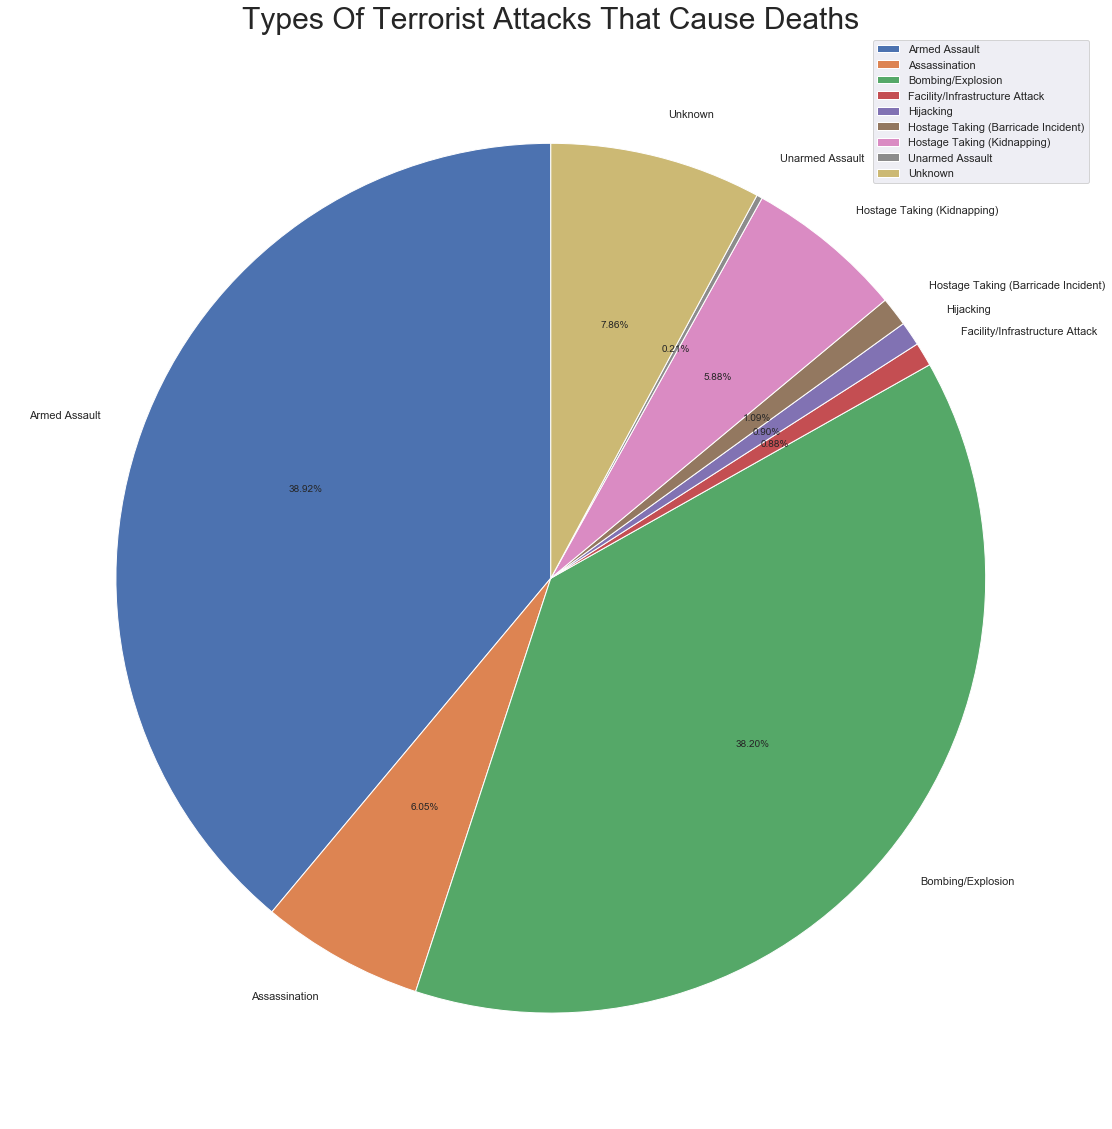

In [89]:
labels = list(df_typeKillData.columns)
transpose = df_typeKillData.T 
values = list(transpose.values)

fig, ax = plt.subplots(figsize=(20, 20))
plt.pie(values, 
        startangle=90, 
        autopct='%.2f%%',
        labels=labels)

plt.title('Types Of Terrorist Attacks That Cause Deaths',fontsize=30)
plt.legend()
plt.show()

In [124]:
WeaponType = df_terror.loc[:,"Weapon_type"]

WeapontypeKillData = pd.concat([WeaponType, killData], axis=1)
WeapontypeKillData.head()

,Weapon_type,Killed
0,Unknown,1
1,Unknown,0
2,Unknown,1
3,Explosives,0
4,Incendiary,0


In [125]:
df_WeaponType = WeapontypeKillData.pivot_table(columns='Weapon_type', values='Killed', aggfunc='sum')
df_WeaponType

Weapon_type,Biological,Chemical,Explosives,Fake Weapons,Firearms,Incendiary,Melee,Other,Radiological,Sabotage Equipment,Unknown,"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)"
Killed,9,624,174277,1,174894,5476,10575,123,2,83,42620,3184


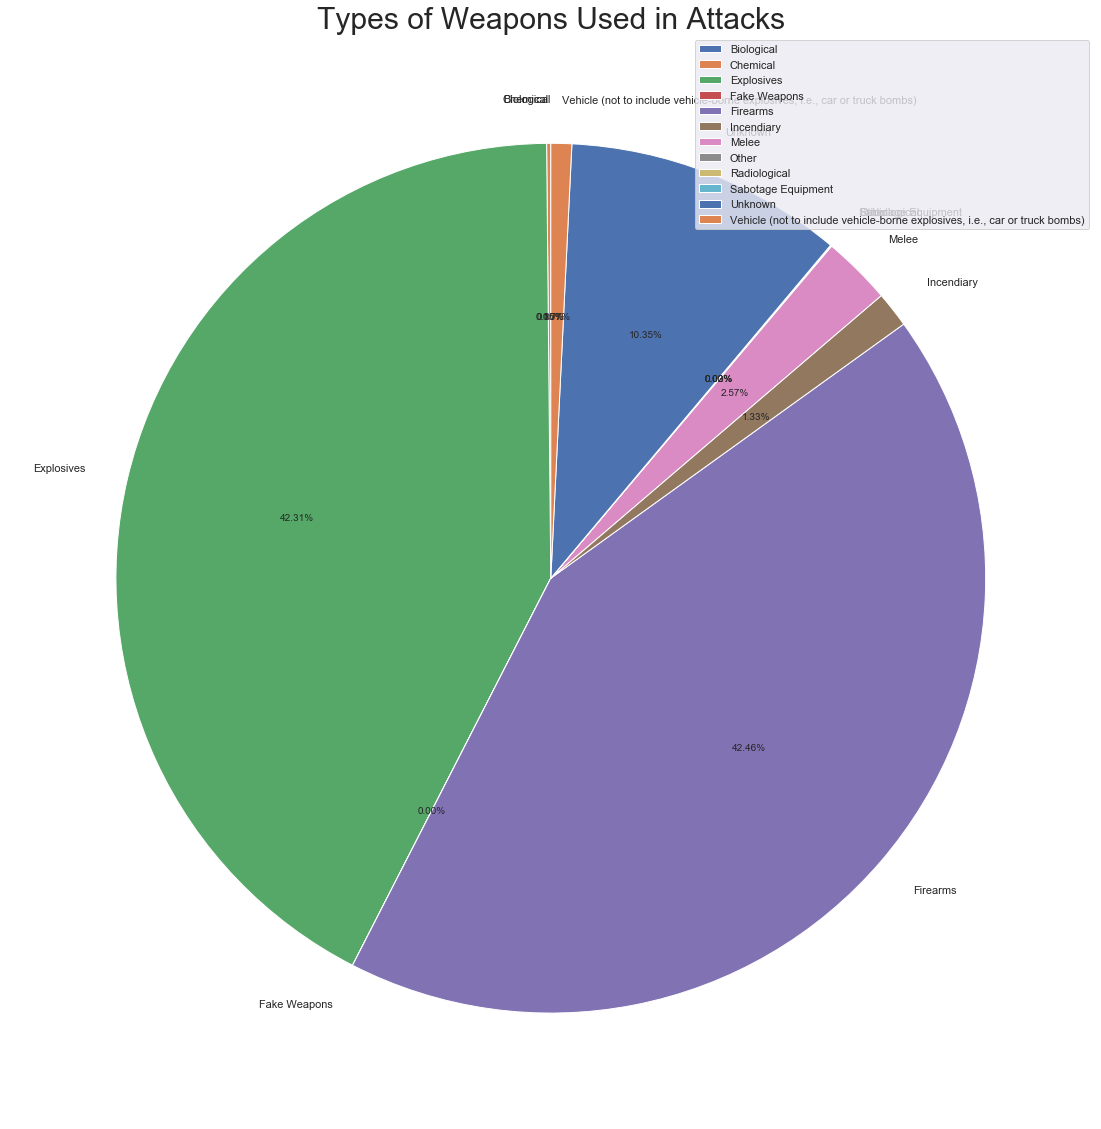

In [126]:
labels = list(df_WeaponType.columns)
transpose = df_WeaponType.T 
values = list(transpose.values)

fig, ax = plt.subplots(figsize=(20, 20))
plt.pie(values, 
        startangle=90, 
        autopct='%.2f%%',
        labels=labels)

plt.title('Types of Weapons Used in Attacks',fontsize=30)
plt.legend()
plt.show()

In [130]:
Target_type = df_terror.loc[:,"Target_type"]
Target_type.head()

0    Private Citizens & Property
1        Government (Diplomatic)
2            Journalists & Media
3        Government (Diplomatic)
4        Government (Diplomatic)
Name: Target_type, dtype: object

In [131]:
city = df_terror.loc[:,"city"]
city.head()

0    Santo Domingo
1      Mexico city
2          Unknown
3           Athens
4          Fukouka
Name: city, dtype: object

In [133]:
TargetData = pd.concat([Target_type, city], axis=1)
TargetData.head()

,Target_type,city
0,Private Citizens & Property,Santo Domingo
1,Government (Diplomatic),Mexico city
2,Journalists & Media,Unknown
3,Government (Diplomatic),Athens
4,Government (Diplomatic),Fukouka


In [139]:
df_TargetData = TargetData.pivot_table(columns='Target_type', values='city', aggfunc='count')
df_TargetData

Target_type,Abortion Related,Airports & Aircraft,Business,Educational Institution,Food or Water Supply,Government (Diplomatic),Government (General),Journalists & Media,Maritime,Military,...,Police,Private Citizens & Property,Religious Figures/Institutions,Telecommunication,Terrorists/Non-State Militia,Tourists,Transportation,Unknown,Utilities,Violent Political Party
city,263,1341,20625,4301,315,3569,21211,2947,351,27969,...,24471,43315,4431,1007,3038,440,6788,5892,6015,1866


In [140]:
df_TargetData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, city to city
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Abortion Related                1 non-null      int64
 1   Airports & Aircraft             1 non-null      int64
 2   Business                        1 non-null      int64
 3   Educational Institution         1 non-null      int64
 4   Food or Water Supply            1 non-null      int64
 5   Government (Diplomatic)         1 non-null      int64
 6   Government (General)            1 non-null      int64
 7   Journalists & Media             1 non-null      int64
 8   Maritime                        1 non-null      int64
 9   Military                        1 non-null      int64
 10  NGO                             1 non-null      int64
 11  Other                           1 non-null      int64
 12  Police                          1 non-null      int64
 13  Private 

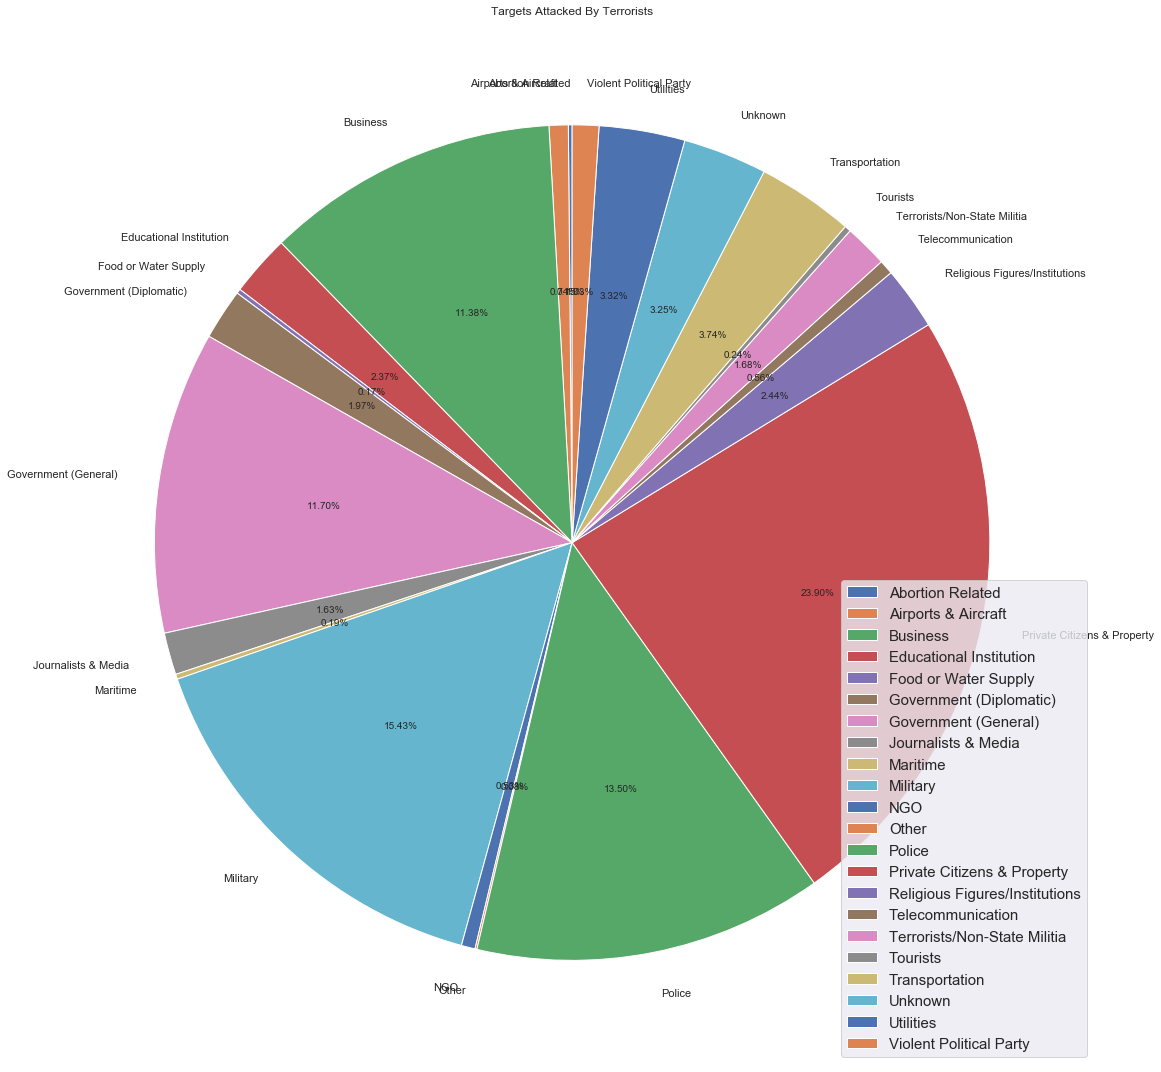

In [147]:
labels = list(df_TargetData.columns)
transpoze = df_TargetData.T 
values = list(transpoze.values)
fig, ax = plt.subplots(figsize=(50, 15))

plt.pie(values, 
        startangle=90, 
        autopct='%.2f%%',
        labels=labels)

plt.title('Targets Attacked By Terrorists')
plt.legend(fontsize=15)
plt.tight_layout()
plt.show()

# Anaslysis By Countries

In [92]:
# Number of Killed in Terrorist Attacks by Countries
countryData = df_terror.loc[:,'Country']
# countyData
countryKillData = pd.concat([countryData, killData], axis=1)

In [93]:
df_countryKillData = countryKillData.pivot_table(columns='Country', values='Killed', aggfunc='sum')
df_countryKillData

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
Killed,39384,42,11066,0,3043,0,490,37,23,30,...,1,0,1500,97,1,8776,119,324,70,154


In [94]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size

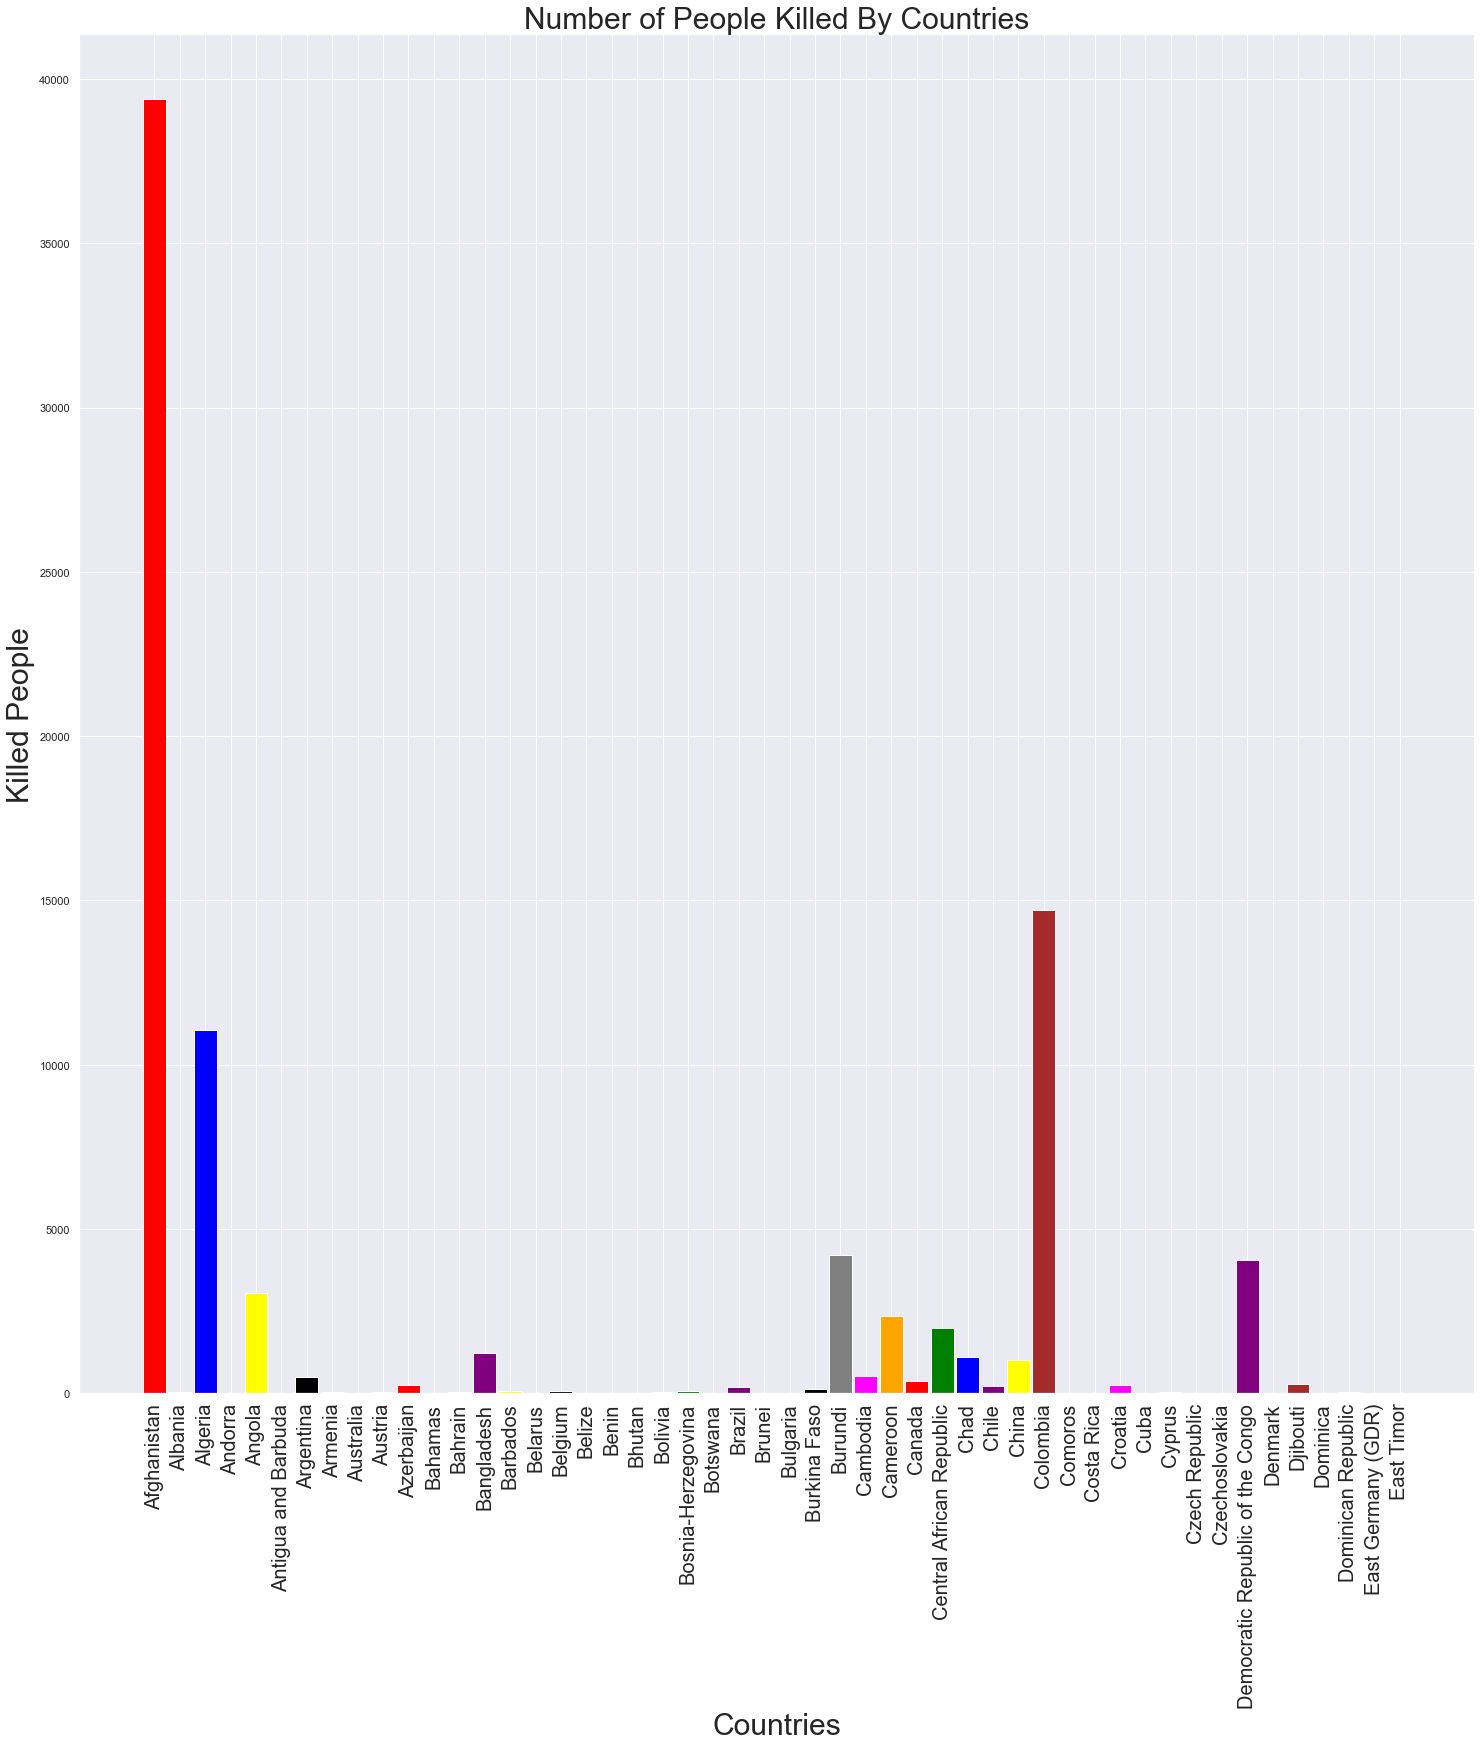

In [97]:
labels = list(df_countryKillData.columns)
labels = labels[:50] 
index = np.arange(len(labels))
transpoze = df_countryKillData.T
values = transpoze.values.tolist()
values = values[:50]

values = [int(i[0]) for i in values] 
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange'] # color list for bar chart bar color 
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=30)
plt.xlabel('Countries', fontsize = 30)
plt.xticks(index, labels, fontsize=20, rotation=90)
plt.title('Number of People Killed By Countries', fontsize = 30)
plt.show()

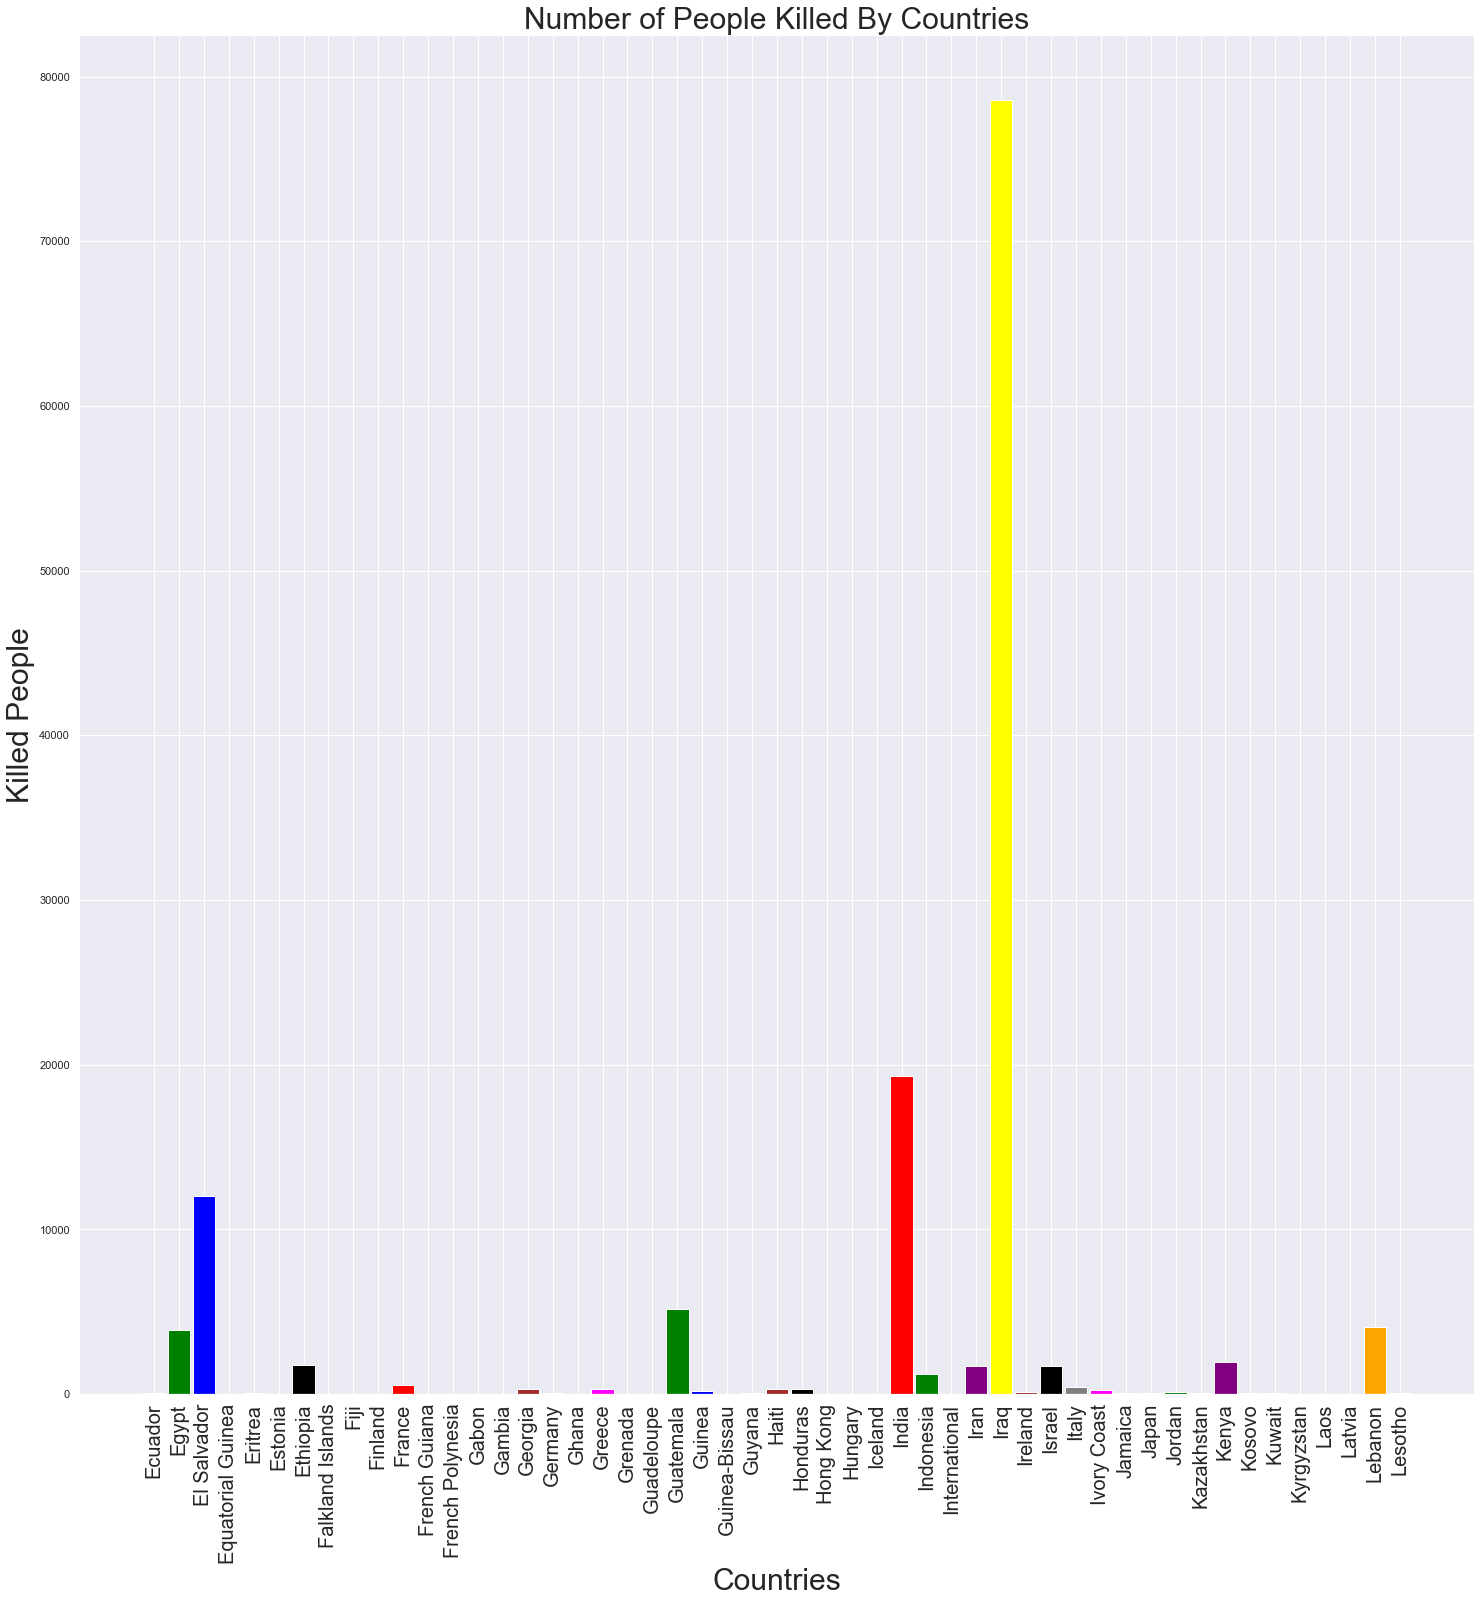

In [98]:
labels = list(df_countryKillData.columns)
labels = labels[50:101] 
index = np.arange(len(labels))
transpoze = df_countryKillData.T
values = transpoze.values.tolist()
values = values[50:101]

values = [int(i[0]) for i in values] 
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange'] # color list for bar chart bar color 
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=30)
plt.xlabel('Countries', fontsize = 30)
plt.xticks(index, labels, fontsize=20, rotation=90)
plt.title('Number of People Killed By Countries', fontsize = 30)
plt.show()

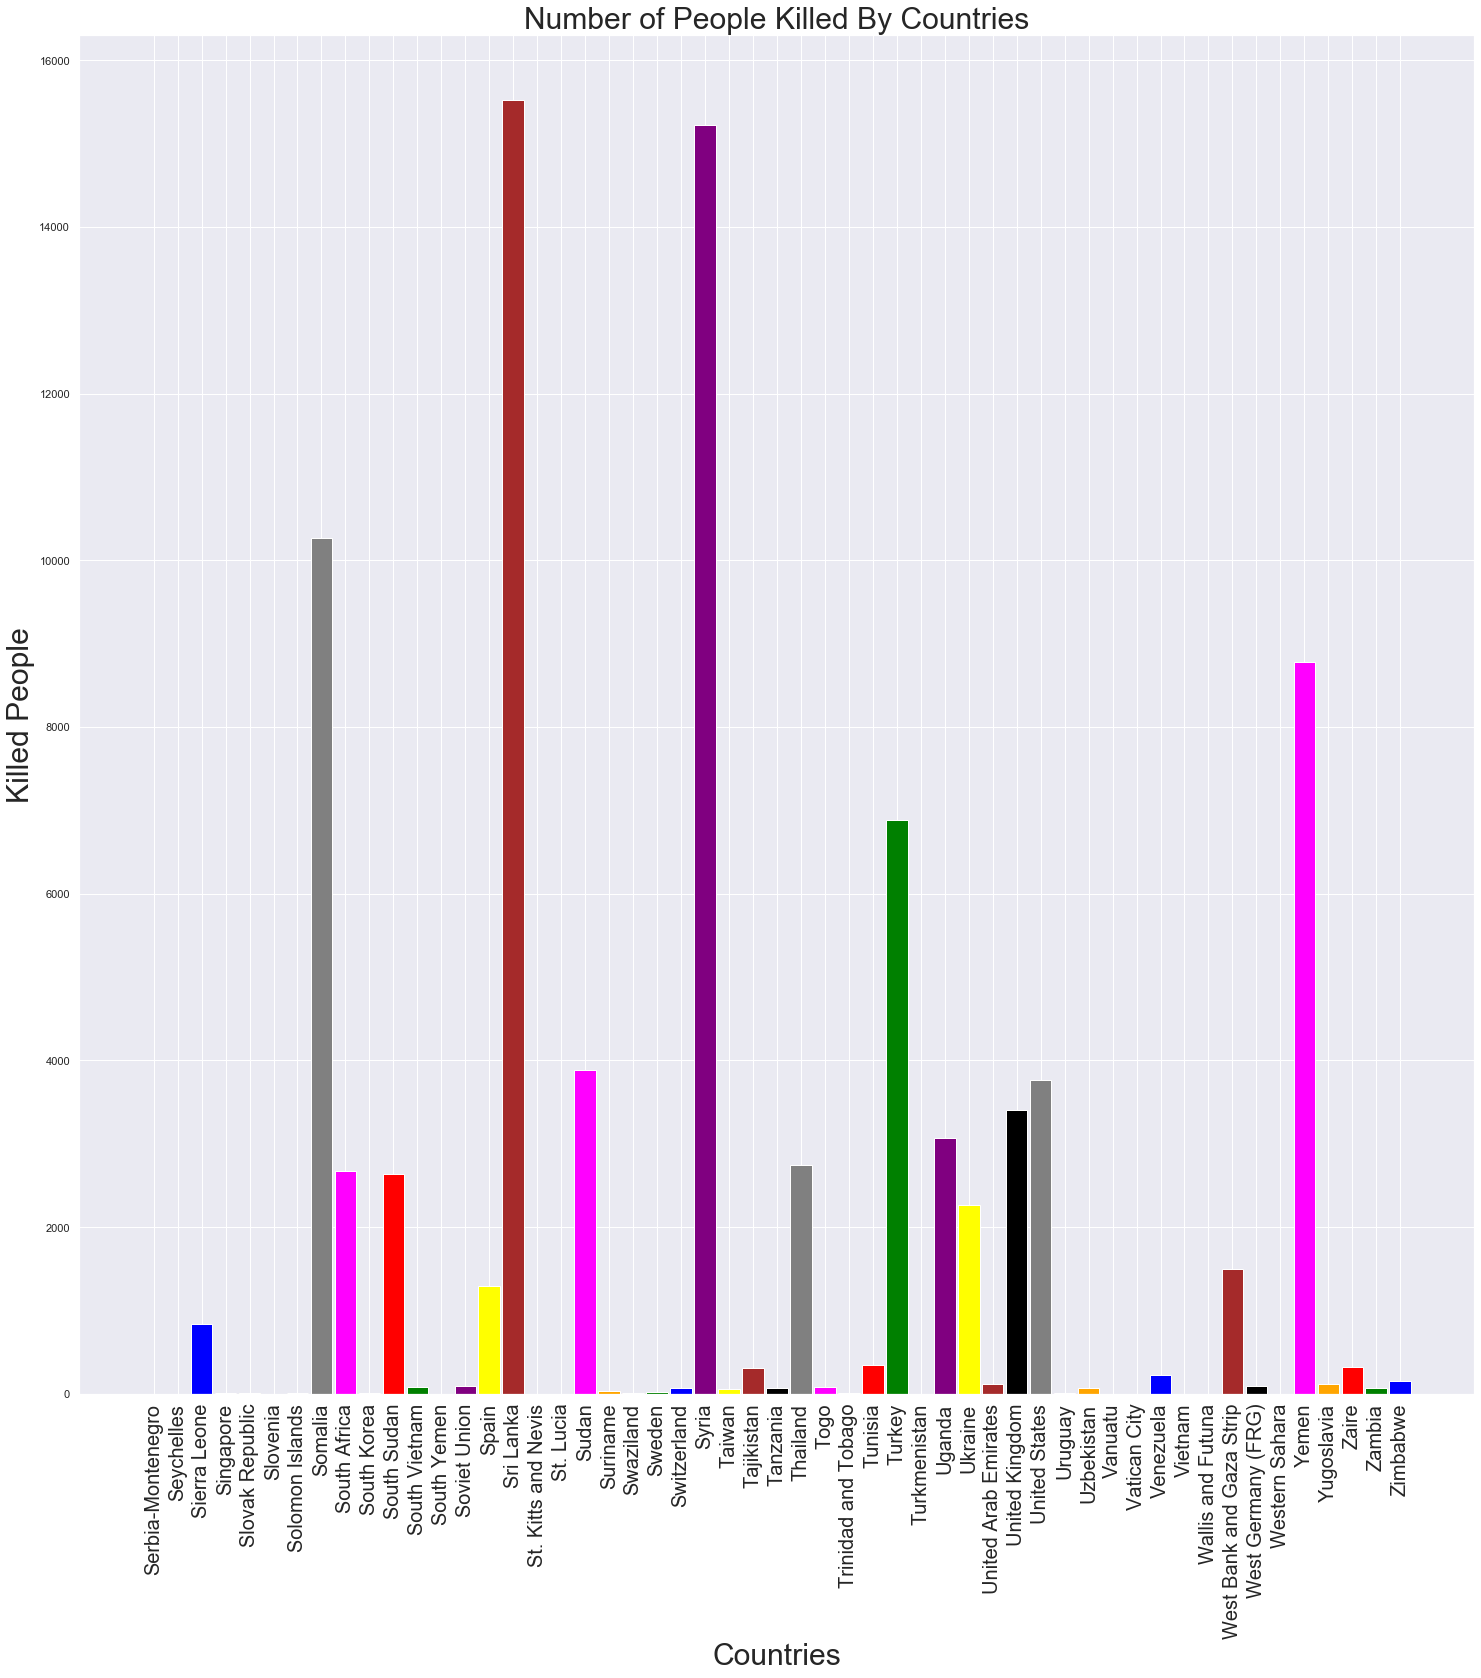

In [100]:
labels = list(df_countryKillData.columns)
labels = labels[152:206] 
index = np.arange(len(labels))
transpoze = df_countryKillData.T
values = transpoze.values.tolist()
values = values[152:206]

values = [int(i[0]) for i in values] 
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange'] # color list for bar chart bar color 
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=30)
plt.xlabel('Countries', fontsize = 30)
plt.xticks(index, labels, fontsize=20, rotation=90)
plt.title('Number of People Killed By Countries', fontsize = 30)
plt.show()

## From the above graphs, we can see that the Middle East and northern Africa have been seen to have face most consequences.Countries where most people are killed are : Afghanisthan, Columbia, Iran, Sri lanka, Syria, Somalia, Yemen naming a few.It appears that these Muslims countries are the most damaged countires.